In [23]:
import pprint
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)

team_data = pd.read_csv("data/team_averages.csv")
matches_data = pd.read_csv("data/full_data.csv")
matchup_data = matches_data[['match_id', 'Radiant', 'Dire', 'radiant_winner']]

matchup_data['diff_assists'] = 0
matchup_data['diff_denies'] = 0
matchup_data['diff_first_blood'] = 0
matchup_data['diff_gpm'] = 0
matchup_data['diff_healing'] = 0
matchup_data['diff_hero_damage'] = 0
matchup_data['diff_kills'] = 0
matchup_data['diff_last_hits'] = 0
matchup_data['diff_match_duration'] = 0
matchup_data['diff_total_levels'] = 0
matchup_data['diff_tower_damage'] = 0
matchup_data['diff_xpm'] = 0

def find_team_difference(team1, team2, i):
    team_map = {'20 min afk les' : 0, 'ALPHA Red' : 1, 'Alliance' : 2, 'BOOM ID': 3, 'Battle Arena Elites' : 4, 'BlinkPool': 5, 'Double Dimension': 6 ,'Entity Gaming': 7 ,'Espada': 8 ,'Evil Geniuses': 9,'Fnatic': 10 ,'Immortals': 11 ,'Invictus Gaming': 12 ,'Kaipi': 13 ,'Kingdra': 14 ,'LeftOneTV':15 ,'MEGA-LADA E-sports': 16 ,'Mineski': 17,'New Guys': 18,'Newbee': 19,'No Bounty Hunter':20 ,'OG':21 ,'OpTic Gaming':22 ,'PSG.LGD':23 ,'SG e-sports team':24 ,'Sterling Global Dragons':25,'TEAM Baidu.':26 ,'TNC Predator':27 ,'TNC Tigers':28 ,'Team Empire': 29 ,'Team Kinguin': 30,'Team Leviathan': 31 ,'Team Liquid':32 ,'Team Secret':33 ,'Team Serenity': 34 ,'Team Singularity': 35 ,'The Final Tribe':36  ,'Torus Gaming': 37 ,'VGJ Storm': 38 ,'VGJ Thunder':39  ,'Vega Squadron':40  ,'Vici Gaming':41  ,'Virtus.pro':42  ,'Wind and Rain':43  ,'Winstrike':44 ,'compLexity Gaming':45  ,'jsut a squad':46  ,'paiN Gaming':47 ,'•': 48}
    team1_ix = team_map[team1]
    team2_ix = team_map[team2]

    matchup_data.loc[i, 'diff_assists'] = team_data.loc[team1_ix, 'assists'] - team_data.loc[team2_ix, 'assists']
    matchup_data.loc[i, 'diff_denies'] = team_data.loc[team1_ix, 'denies'] - team_data.loc[team2_ix, 'denies']
    matchup_data.loc[i, 'diff_first_blood'] = team_data.loc[team1_ix, 'first_blood'] - team_data.loc[team2_ix, 'first_blood']
    matchup_data.loc[i, 'diff_gpm'] = team_data.loc[team1_ix, 'gpm'] - team_data.loc[team2_ix, 'gpm']
    matchup_data.loc[i, 'diff_healing'] = team_data.loc[team1_ix, 'healing'] - team_data.loc[team2_ix, 'healing']
    matchup_data.loc[i, 'diff_hero_damage'] = team_data.loc[team1_ix, 'hero_damage'] - team_data.loc[team2_ix, 'hero_damage']
    matchup_data.loc[i, 'diff_kills'] = team_data.loc[team1_ix, 'kills'] - team_data.loc[team2_ix, 'kills']
    matchup_data.loc[i, 'diff_last_hits'] = team_data.loc[team1_ix, 'last_hits'] - team_data.loc[team2_ix, 'last_hits']
    matchup_data.loc[i, 'diff_match_duration'] = team_data.loc[team1_ix, 'match_duration'] - team_data.loc[team2_ix, 'match_duration']
    matchup_data.loc[i, 'diff_total_levels'] = team_data.loc[team1_ix, 'total_levels'] - team_data.loc[team2_ix, 'total_levels']
    matchup_data.loc[i, 'diff_tower_damage'] = team_data.loc[team1_ix, 'tower_damage'] - team_data.loc[team2_ix, 'tower_damage']
    matchup_data.loc[i, 'diff_xpm'] = team_data.loc[team1_ix, 'xpm'] - team_data.loc[team2_ix, 'xpm']

for x in range(0, len(matchup_data)):
    print(x, " of ", len(matchup_data))
    try:
        find_team_difference(matchup_data.loc[x,'Radiant'], matchup_data.loc[x, 'Dire'], x)
    except:
        print("Not able to find ", x)

matchup_data.to_csv("data/matchup_data.csv", index = False)

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

0  of  381
1  of  381
2  of  381
3  of  381
4  of  381
5  of  381
6  of  381
7  of  381
8  of  381
9  of  381
10  of  381
11  of  381
12  of  381
13  of  381
14  of  381
15  of  381
16  of  381
17  of  381
18  of  381
19  of  381
20  of  381
21  of  381
22  of  381
23  of  381
24  of  381
25  of  381
26  of  381
27  of  381
28  of  381
29  of  381
30  of  381
31  of  381
32  of  381
33  of  381
34  of  381
35  of  381
36  of  381
37  of  381
38  of  381
39  of  381
40  of  381
41  of  381
42  of  381
43  of  381
44  of  381
45  of  381
46  of  381
47  of  381
48  of  381
49  of  381
50  of  381
51  of  381
52  of  381
53  of  381
54  of  381
55  of  381
56  of  381
57  of  381
58  of  381
59  of  381
60  of  381
61  of  381
62  of  381
63  of  381
64  of  381
65  of  381
66  of  381
67  of  381
68  of  381
69  of  381
70  of  381
71  of  381
72  of  381
73  of  381
74  of  381
75  of  381
76  of  381
77  of  381
78  of  381
79  of  381
80  of  381
81  of  381
82  of  381
83  of  381
84

In [24]:
import pandas as pd
df=pd.read_csv('data/matchup_data.csv')


In [25]:
df

,match_id,Radiant,Dire,radiant_winner,diff_assists,diff_denies,diff_first_blood,diff_gpm,diff_healing,diff_hero_damage,diff_kills,diff_last_hits,diff_match_duration,diff_total_levels,diff_tower_damage,diff_xpm
0,3966654369,BlinkPool,OG,0,-17.477273,9.765734,75.382867,-6.552448,-5060.501748,-21543.166084,-7.489510,185.562937,146.246503,3.080420,1804.223776,-28.416084
1,3966744537,TNC Predator,BOOM ID,1,14.666667,-9.962963,58.074074,264.111111,-1991.703704,18138.333333,5.000000,240.148148,460.222222,14.074074,-1529.074074,265.222222
2,3966744778,Entity Gaming,ALPHA Red,1,6.222222,21.111111,-67.222222,11.222222,-3179.555556,-3491.444444,3.333333,-92.000000,-88.000000,-3.333333,2561.222222,19.777778
3,3966752666,Alliance,Team Kinguin,0,-2.746032,5.063492,-18.238095,-10.809524,-1570.301587,-3383.000000,-0.063492,-62.365079,-77.269841,-1.428571,2095.444444,-40.523810
4,3966788182,OG,Team Singularity,1,6.840909,-4.227273,15.931818,284.272727,1700.795455,10419.431818,4.363636,-5.500000,-181.022727,0.227273,3358.818182,177.590909
5,3966866578,Battle Arena Elites,Fnatic,0,-34.291667,-10.208333,18.875000,-527.375000,-4658.083333,-34260.166667,-16.583333,-365.125000,-614.125000,-22.750000,-7890.208333,-571.708333
6,3966884585,Entity Gaming,TNC Tigers,1,8.822222,8.311111,-60.855556,-85.344444,-3424.255556,-8600.411111,3.666667,-188.866667,-427.633333,-6.666667,-1471.511111,35.277778
7,3966957407,Wind and Rain,The Final Tribe,1,18.625000,20.937500,-47.937500,306.125000,67.125000,-3556.906250,10.625000,-7.687500,-136.656250,1.375000,7705.312500,252.968750
8,3966977095,Alliance,BlinkPool,0,16.476190,-6.586081,-47.007326,-80.347985,2385.424908,23834.461538,6.688645,-22.630037,232.516484,0.263736,-2086.102564,-45.062271
9,3967002678,Sterling Global Dragons,BOOM ID,0,5.333333,-17.000000,23.000000,-15.333333,-1136.333333,8243.333333,2.666667,-33.666667,233.333333,7.333333,-3393.666667,88.666667


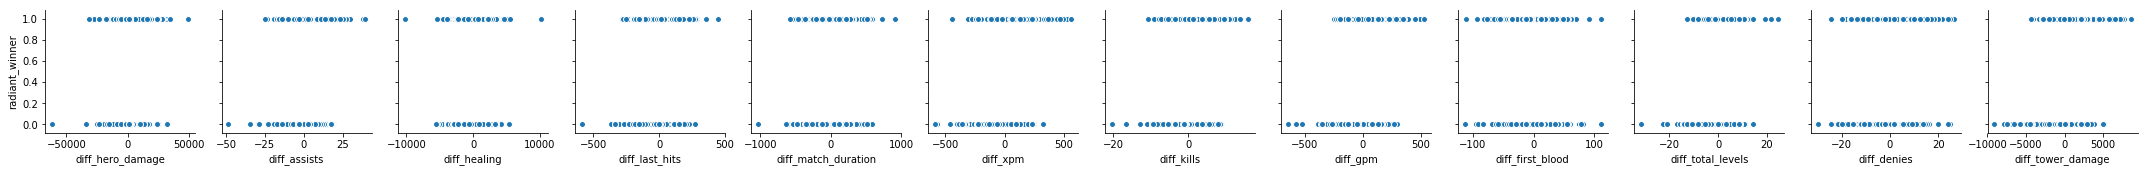

In [26]:
import seaborn as sns

lg=sns.pairplot(df,x_vars={'diff_assists', 'diff_denies','diff_first_blood','diff_gpm','diff_healing','diff_hero_damage','diff_kills','diff_last_hits','diff_match_duration','diff_total_levels','diff_tower_damage','diff_xpm','diff_healing'},y_vars='radiant_winner')

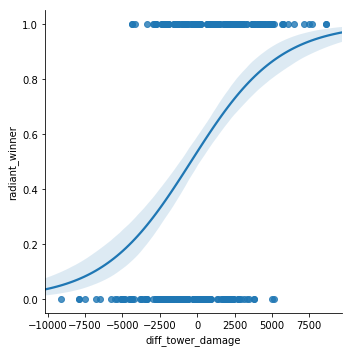

In [27]:
g = sns.lmplot(x="diff_tower_damage", y="radiant_winner", data=df, logistic=True)

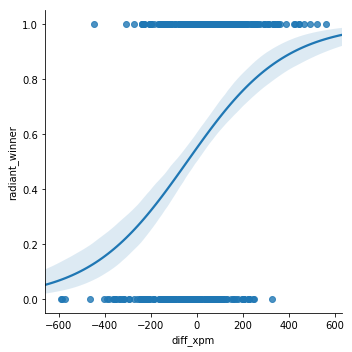

In [28]:
g = sns.lmplot(x="diff_xpm", y="radiant_winner", data=df, logistic=True)